# Credit Risk Analysis & Model Comparison
This notebook demonstrates a data analysis pipeline for predicting credit risk. We load the dataset, conduct exploratory analysis, preprocess the data, train three machine learning models, and then compare their performance. Adjust the code as needed to reflect your own data and project goals.


In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import xgboost as xgb
import warnings
warnings.filterwarnings('ignore')


#Load the dataset

In [58]:
data = pd.read_csv('UCI_Credit_Card.csv')
print("Dataset shape:", data.shape)
data.head()


Dataset shape: (30000, 25)


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


# Exploratory Data Analysis (EDA)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

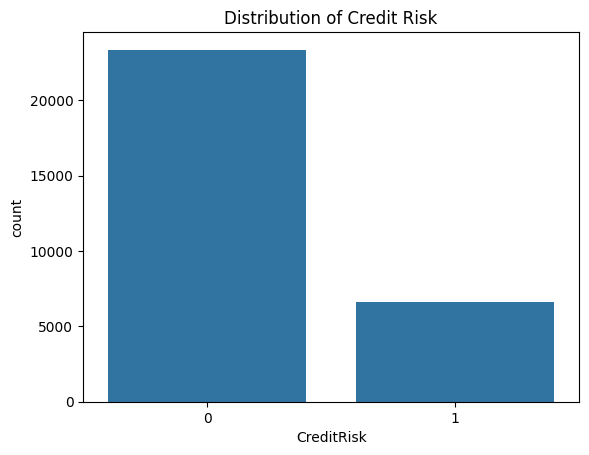

In [59]:
# Display dataset information to understand types, null values, and statistics
print(data.info())
print(data.describe())
print("Missing values per column:\n", data.isnull().sum())

# Rename the target variable column
data = data.rename(columns={'default.payment.next.month': 'CreditRisk'})


# Use the new column name for the target variable
sns.countplot(x='CreditRisk', data=data)
plt.title('Distribution of Credit Risk')
plt.show()

# Visualize feature relationships

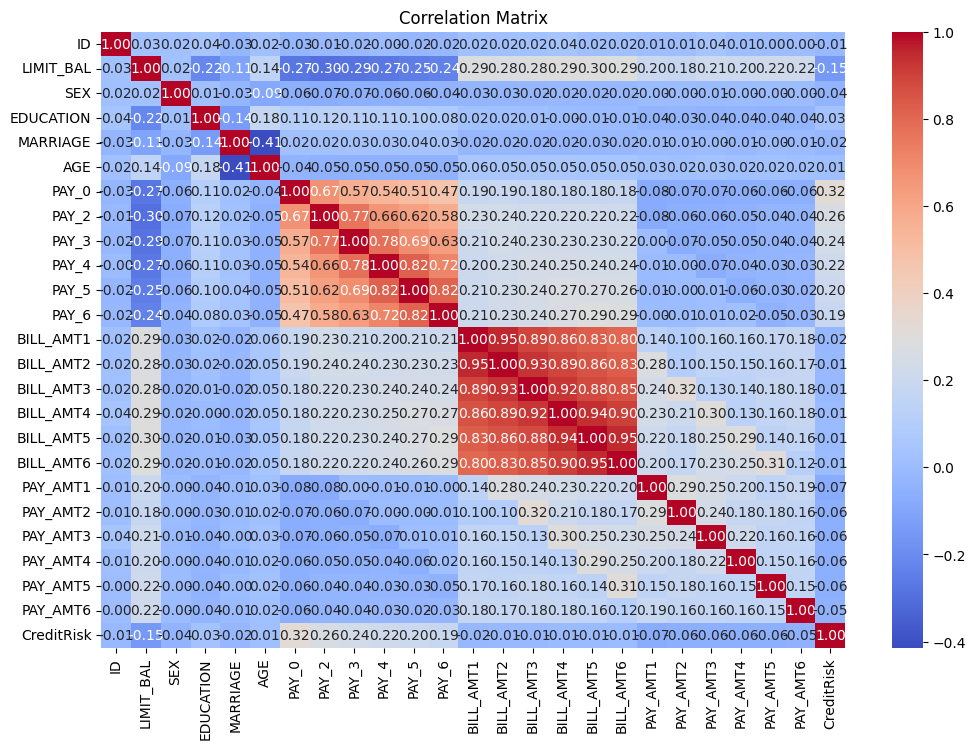

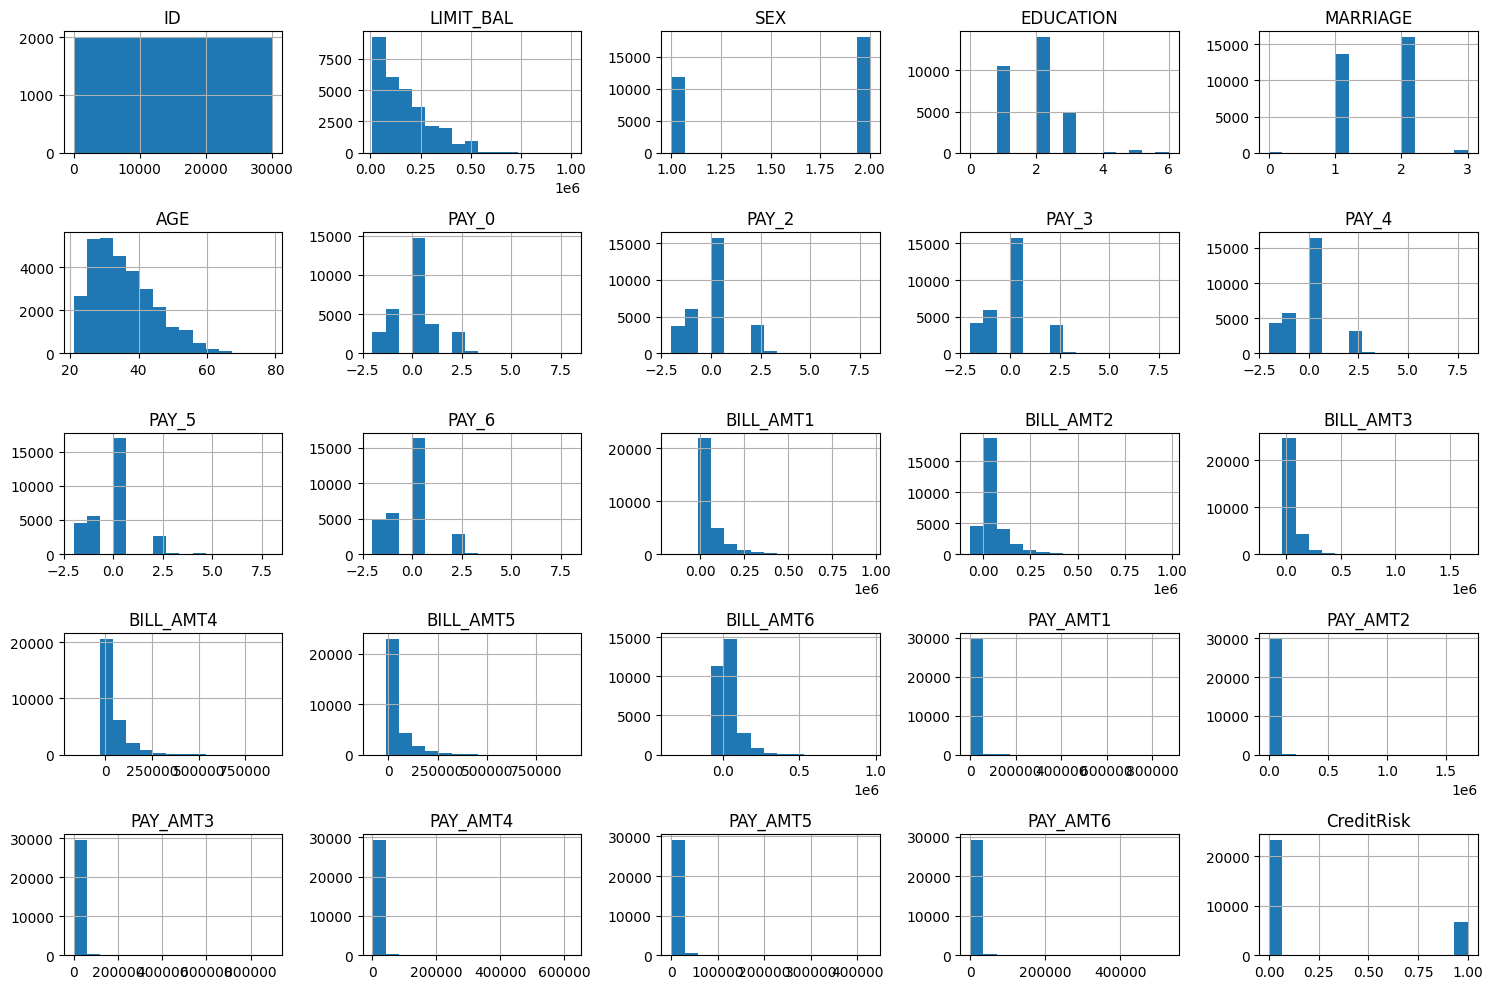

In [60]:
# correlation matrix
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Plot histograms for numerical features to inspect distributions
num_cols = data.select_dtypes(include=['float64', 'int64']).columns
data[num_cols].hist(bins=15, figsize=(15, 10))
plt.tight_layout()
plt.show()


# Separate features and target variable ('CreditRisk'), then split into training and testing sets.

In [61]:
# Separate features and target variable ('CreditRisk'), then split into training and testing sets.
X = data.drop('CreditRisk', axis=1)
y = data['CreditRisk']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
print("Train shape:", X_train.shape, "Test shape:", X_test.shape)


Train shape: (21000, 24) Test shape: (9000, 24)


# Train a Logistic Regression model on the training data.

In [62]:
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)

# Evaluate the model using accuracy score
print("Logistic Regression Accuracy:", accuracy_score(y_test, lr_pred))


Logistic Regression Accuracy: 0.8087777777777778


# Train a Random Forest Classifier on the training data.


In [63]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

# Evaluate the Random Forest model
print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))


Random Forest Accuracy: 0.8136666666666666


# Train an XGBoost Classifier on the training data.

In [64]:
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)

# Evaluate the XGBoost model
print("XGBoost Accuracy:", accuracy_score(y_test, xgb_pred))


XGBoost Accuracy: 0.8102222222222222


# Evaluate each model using classification reports, confusion matrices, and AUC scores.

Logistic Regression Classification Report
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      7040
           1       0.68      0.23      0.35      1960

    accuracy                           0.81      9000
   macro avg       0.75      0.60      0.62      9000
weighted avg       0.79      0.81      0.77      9000



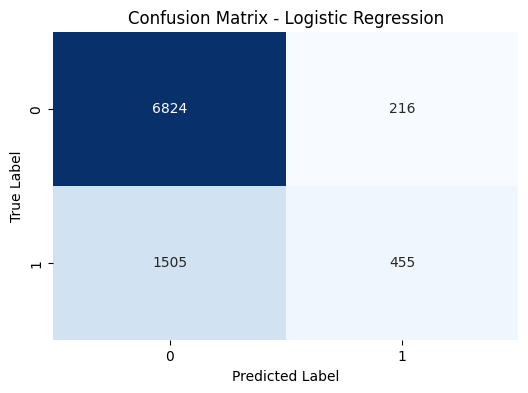

 Random Forest Classification Report
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      7040
           1       0.63      0.36      0.46      1960

    accuracy                           0.81      9000
   macro avg       0.73      0.65      0.67      9000
weighted avg       0.79      0.81      0.79      9000



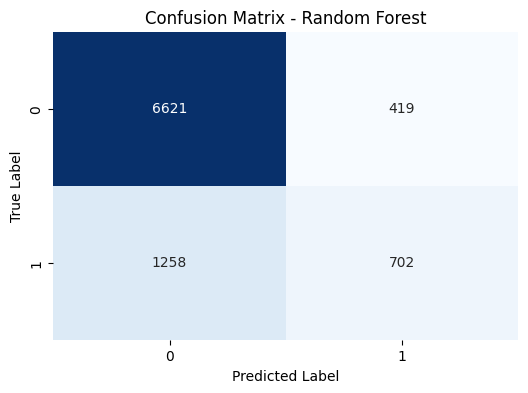

XGBoost Classification Report
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      7040
           1       0.61      0.36      0.45      1960

    accuracy                           0.81      9000
   macro avg       0.72      0.65      0.67      9000
weighted avg       0.79      0.81      0.79      9000



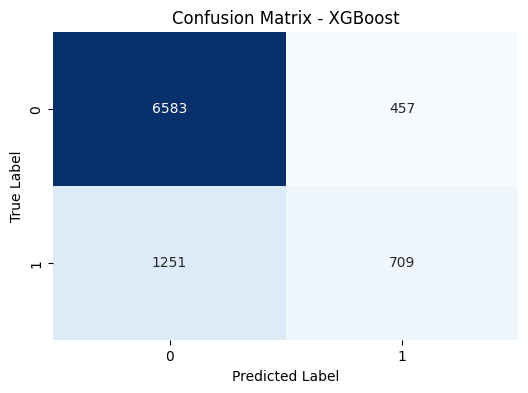

In [65]:

# Function to plot confusion matrix as a heatmap
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()

# Evaluate Logistic Regression
print("Logistic Regression Classification Report")
print(classification_report(y_test, lr_pred))
plot_confusion_matrix(y_test, lr_pred, 'Logistic Regression')
lr_auc = roc_auc_score(y_test, lr_model.predict_proba(X_test)[:, 1])

# Evaluate Random Forest
print(" Random Forest Classification Report")
print(classification_report(y_test, rf_pred))
plot_confusion_matrix(y_test, rf_pred, 'Random Forest')
rf_auc = roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1])

# Evaluate XGBoost
print("XGBoost Classification Report")
print(classification_report(y_test, xgb_pred))
plot_confusion_matrix(y_test, xgb_pred, 'XGBoost')
xgb_auc = roc_auc_score(y_test, xgb_model.predict_proba(X_test)[:, 1])


#ROC Curve Visualization for Model Comparison

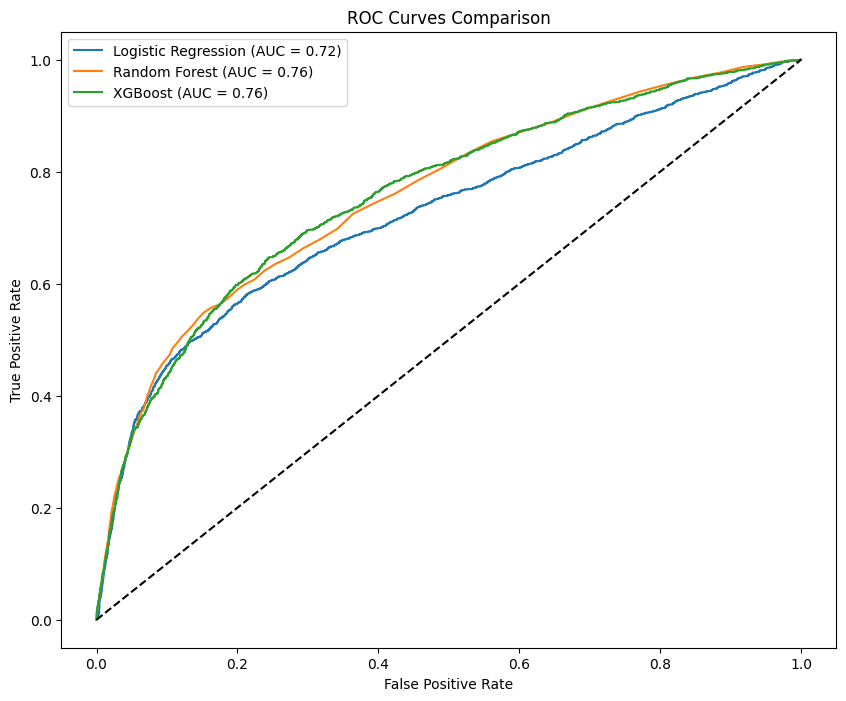

In [66]:
plt.figure(figsize=(10, 8))

models = {
    "Logistic Regression": lr_model,
    "Random Forest": rf_model,
    "XGBoost": xgb_model
}

for name, model in models.items():
    y_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    auc_score = roc_auc_score(y_test, y_proba)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc_score:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves Comparison')
plt.legend()
plt.show()


#Model Performance Comparison

<Figure size 1000x600 with 0 Axes>

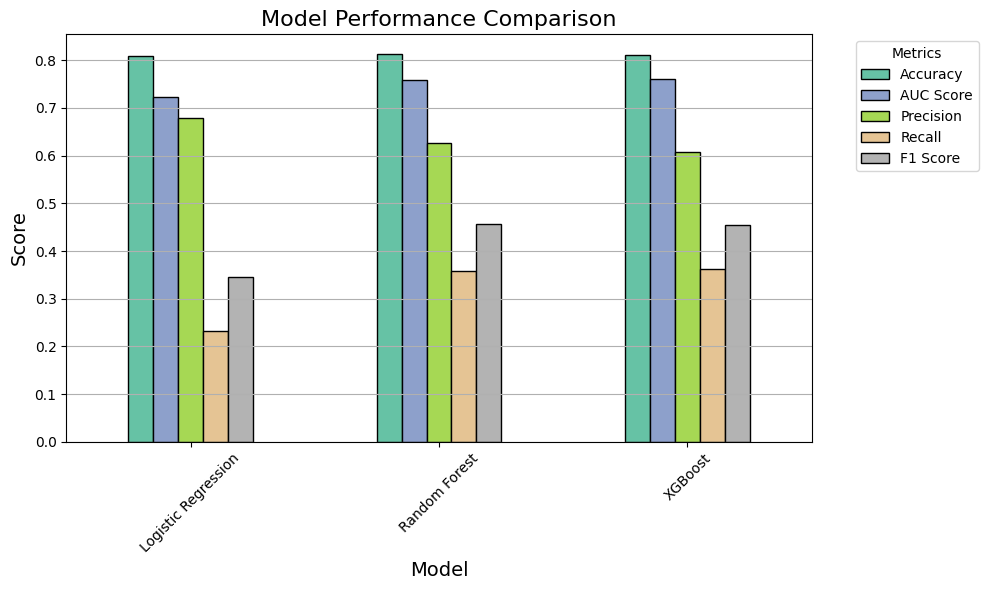

In [67]:
model_names = ['Logistic Regression', 'Random Forest', 'XGBoost']
predictions = [lr_pred, rf_pred, xgb_pred]
auc_scores = [lr_auc, rf_auc, xgb_auc]

metrics = {
    'Model': model_names,
    'Accuracy': [accuracy_score(y_test, pred) for pred in predictions],
    'AUC Score': auc_scores,
    'Precision': [precision_score(y_test, pred) for pred in predictions],
    'Recall': [recall_score(y_test, pred) for pred in predictions],
    'F1 Score': [f1_score(y_test, pred) for pred in predictions]
}

# Convert to a DataFrame for easier plotting
metrics_df = pd.DataFrame(metrics).set_index('Model')

# Plotting the metrics comparison
plt.figure(figsize=(10, 6))
metrics_df.plot(kind='bar', figsize=(10, 6), colormap='Set2', edgecolor='black')

plt.title('Model Performance Comparison', fontsize=16)
plt.xlabel('Model', fontsize=14)
plt.ylabel('Score', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Metrics', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y')
plt.tight_layout()

plt.show()


# Model Performance Summary

## Logistic Regression
- **Accuracy:** 0.81
- **AUC Score:** 0.72
- **Key Observations:** High precision and recall for the majority class (0), but struggles with the minority class (1).

## Random Forest
- **Accuracy:** 0.81
- **AUC Score:** 0.76
- **Key Observations:** Better balance between precision and recall for the minority class compared to Logistic Regression.

## XGBoost
- **Accuracy:** 0.81
- **AUC Score:** 0.76
- **Key Observations:** Similar performance to Random Forest, showing robust handling of imbalanced classes.

## Conclusion
- **Best Model:** Both Random Forest and XGBoost outperform Logistic Regression, particularly in handling the minority class (1).
- **Recommendation:** While all models show similar accuracy, the higher AUC scores of Random Forest and XGBoost make them preferable for scenarios where correctly identifying credit risk is critical.
